In [109]:
#Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [5]:
# Import Data 

In [6]:
df = pd.read_csv('segmentation data.csv', index_col = 0)

In [7]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [8]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


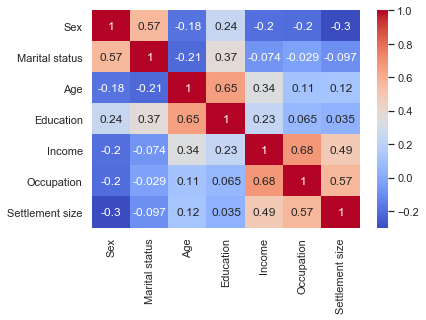

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

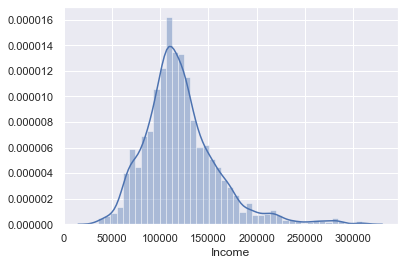

In [11]:
sns.distplot(df['Income'])


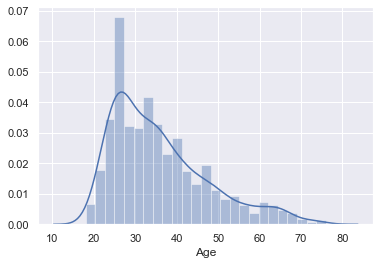

In [12]:
sns.distplot(df['Age'])

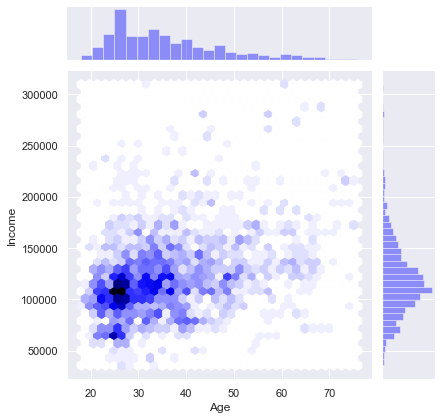

In [13]:
sns.jointplot(x='Age',y='Income',data=df,kind='hex', color='blue')

In [14]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


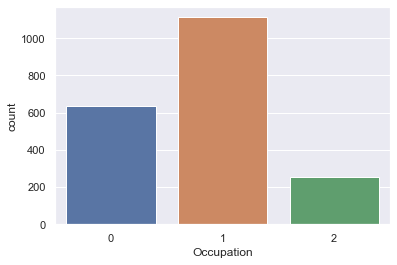

In [15]:
sns.countplot(x='Occupation',data=df)

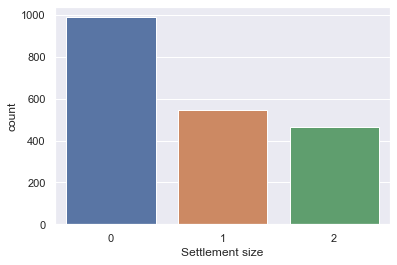

In [16]:
sns.countplot(x='Settlement size',data=df)

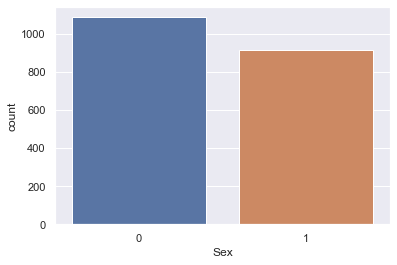

In [17]:
sns.countplot(x='Sex',data=df)

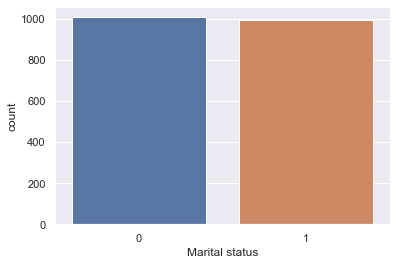

In [18]:
sns.countplot(x='Marital status',data=df)

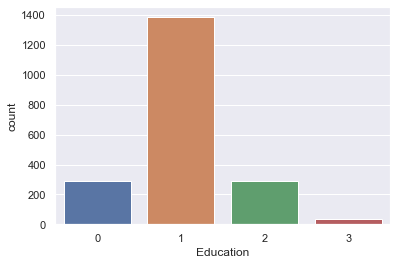

In [19]:
sns.countplot(x='Education',data=df)

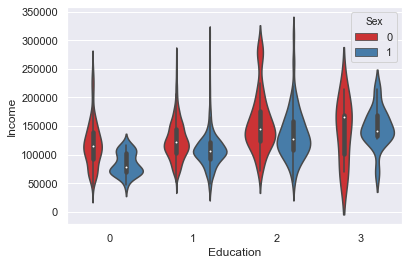

In [20]:
sns.violinplot(x="Education", y="Income", data=df,hue='Sex',palette='Set1')

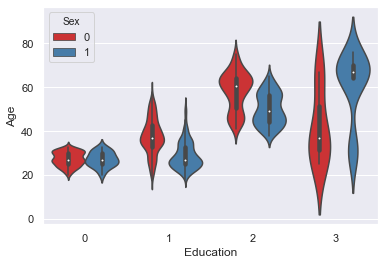

In [21]:
sns.violinplot(x="Education", y="Age", data=df,hue='Sex',palette='Set1')

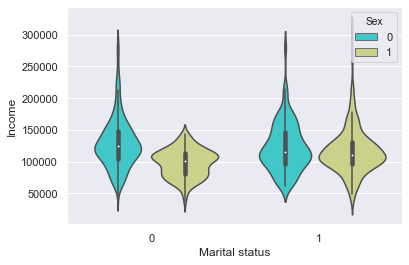

In [22]:
sns.violinplot(x="Marital status", y="Income", data=df,hue='Sex',palette='rainbow')

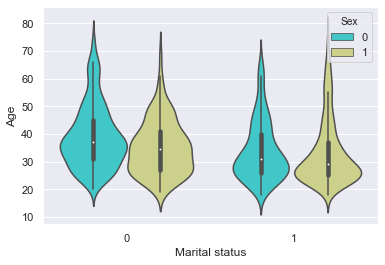

In [23]:
sns.violinplot(x="Marital status", y="Age", data=df,hue='Sex',palette='rainbow')

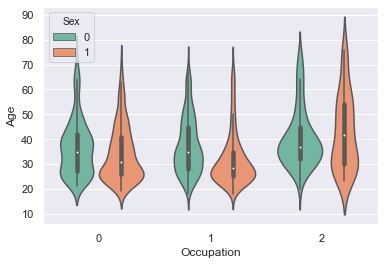

In [24]:
sns.violinplot(x="Occupation", y="Age", data=df,hue='Sex',palette='Set2')

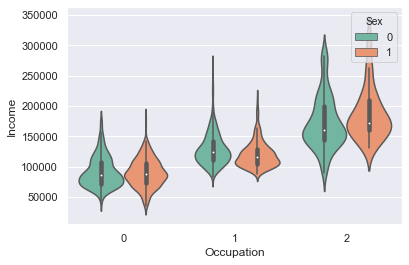

In [25]:
sns.violinplot(x="Occupation", y="Income", data=df,hue='Sex',palette='Set2')

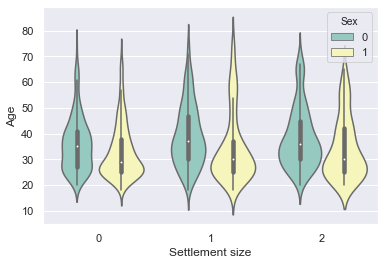

In [26]:
sns.violinplot(x="Settlement size", y="Age", data=df,hue='Sex',palette='Set3')

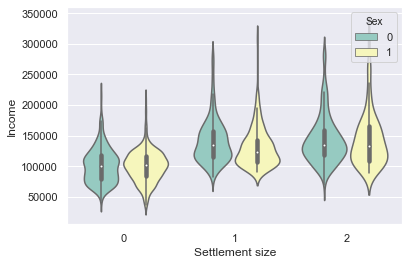

In [27]:
sns.violinplot(x="Settlement size", y="Income", data=df,hue='Sex',palette='Set3')

<Figure size 2016x1152 with 0 Axes>

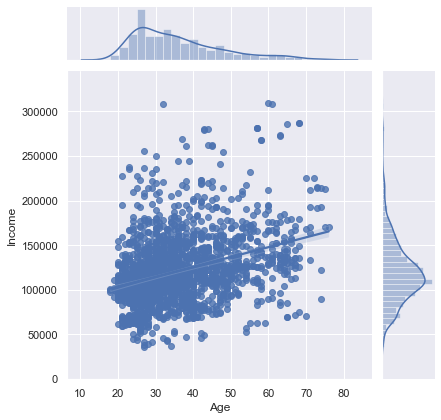

In [28]:
plt.figure(figsize=(28,16))

g = sns.JointGrid(x="Age", y="Income", data=df)
g = g.plot(sns.regplot, sns.distplot)

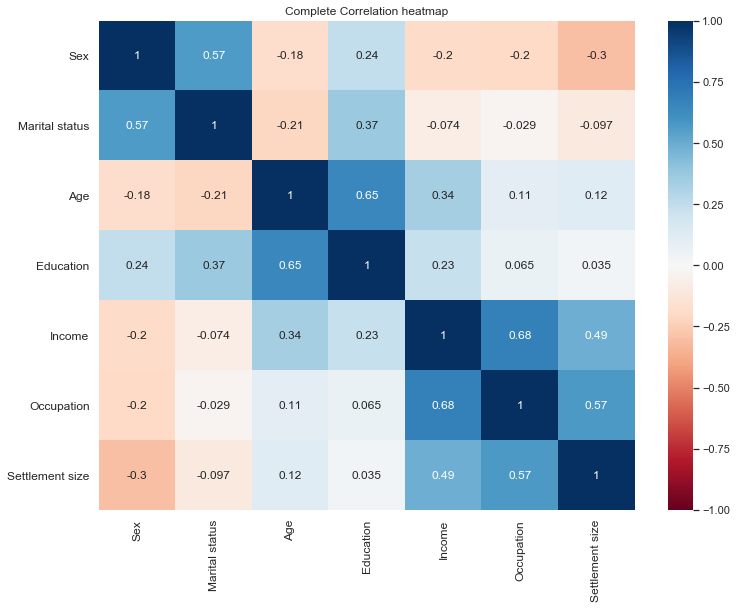

In [29]:
plt.figure(figsize=(12,9))

s= sns.heatmap(df.corr(), annot = True, cmap  = 'RdBu', vmin  = -1, vmax  = 1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Complete Correlation heatmap')
plt.show()




Text(0.5, 1.0, 'Visulaization of Raw Data')

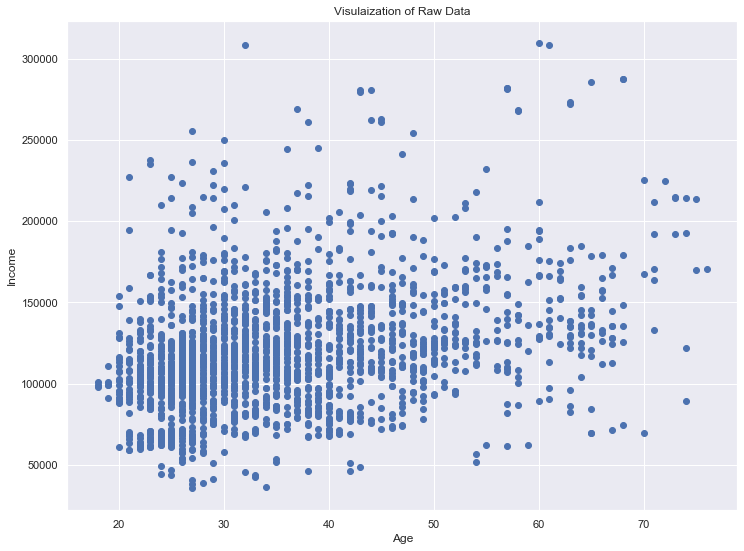

In [30]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visulaization of Raw Data')

In [31]:
# Standardrization

In [32]:
scaler = StandardScaler()

In [33]:
seg_std = scaler.fit_transform(df)

In [34]:
# Hierarchical Clustering

In [35]:
hier_cluster = linkage(seg_std, method ='ward')

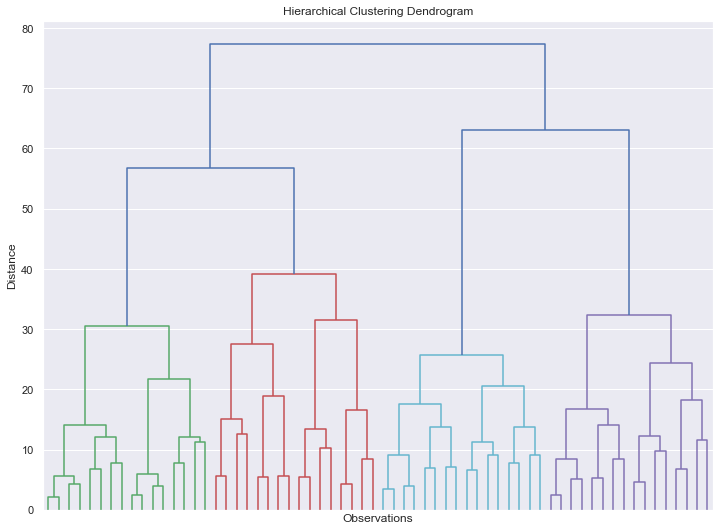

In [36]:
plt.figure(figsize =(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster,
           truncate_mode ='level',
           p=5,
         show_leaf_counts =False,
         no_labels = True,
         )
plt.show()

In [37]:
# K_Means Clustering

In [38]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(seg_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-Means Clustering Plot')

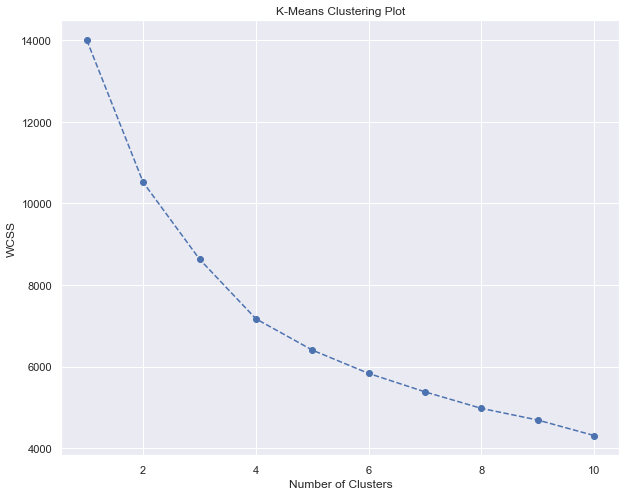

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle ='--' )
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering Plot')

In [40]:
kmeans =  KMeans(n_clusters=4, init ='k-means++', random_state = 42)
kmeans.fit (seg_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [41]:
# Results

In [42]:
df_k_means = df.copy()

In [43]:
df_k_means['Segment K-Means'] = kmeans.labels_

In [44]:
df_k_means_analysis = df_k_means.groupby(['Segment K-Means']).mean()

In [45]:
df_k_means_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [46]:
df_k_means_analysis['NO of Obs']= df_k_means[['Segment K-Means','Sex']].groupby(['Segment K-Means']).count() 


In [47]:
df_k_means_analysis['NO of Obs']

Segment K-Means
0    263
1    462
2    570
3    705
Name: NO of Obs, dtype: int64

In [48]:
df_k_means_analysis['Prop of obs']= df_k_means_analysis['NO of Obs']/ df_k_means_analysis['NO of Obs'].sum()

In [49]:
df_k_means_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,NO of Obs,Prop of obs
Segment K-Means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [50]:
df_k_means_analysis.rename(index={0: "Well-off and Aged", 1: "Less Opportunities and Income", 2: "Average Consumer", 3: "Career-focused Consumers"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,NO of Obs,Prop of obs
Segment K-Means,,,,,,,,,
Well-off and Aged,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Less Opportunities and Income,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Average Consumer,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Career-focused Consumers,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [51]:
df_k_means['Labels']=df_k_means['Segment K-Means'].map ({0: "Well-off and Aged", 1: "Less Opportunities and Income", 2: "Average Consumer", 3: "Career-focused Consumers"})

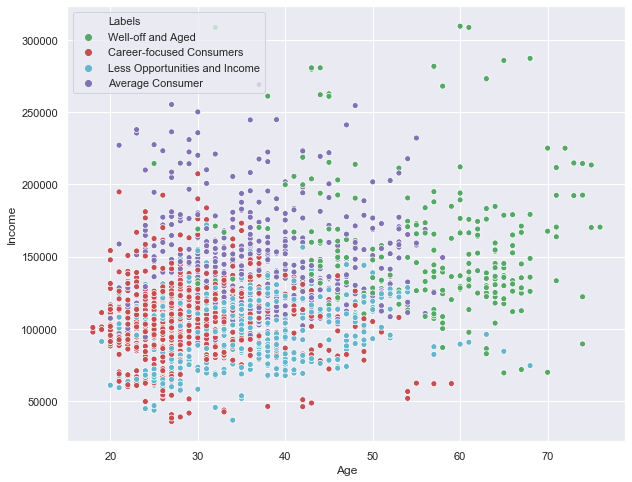

In [52]:
x_axis = df_k_means['Age']
y_axis = df_k_means['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue = df_k_means['Labels'], palette =['g','r','c','m'])

In [53]:
# PCA - dimension reduction

In [54]:
pca = PCA()

In [55]:
pca.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explaination ')

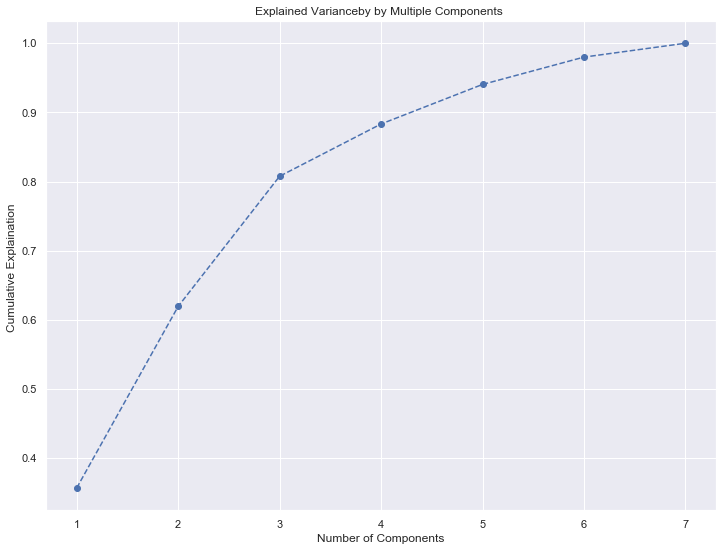

In [57]:
plt.figure(figsize=(12,9) )
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Varianceby by Multiple Components ')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explaination ')

In [58]:
pca = PCA(n_components=3 )
pca.fit(seg_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
# PCA Results 

In [60]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [61]:
df_pca = pd.DataFrame(data = pca.components_, 
                     columns = df.columns.values,
                     index=['Component1 ', 'Component 2', 'Component 3'])

In [62]:
df_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x2305f0d3d48>,
 <a list of 3 Text yticklabel objects>)

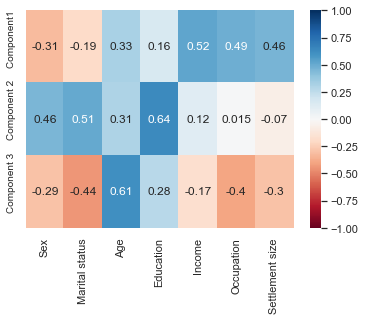

In [63]:
sns.heatmap(df_pca,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2], 
          ['Component1 ', 'Component 2', 'Component 3'],
          rotation =90,
          fontsize=10)

In [64]:
pca.transform(seg_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [65]:
pca_scores = pca.transform(seg_std)

In [66]:
# K-means clustering on PCA

In [67]:
wcss=[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-Means Clustering Plot')

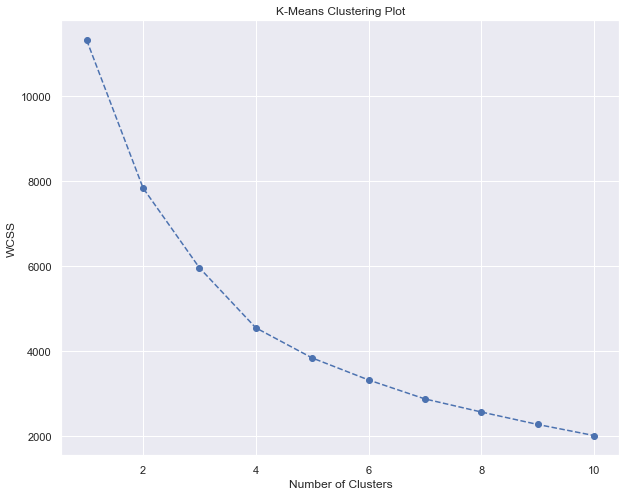

In [68]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle ='--' )
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering Plot')

In [69]:
k_means_pca = KMeans(n_clusters=4 , init ='k-means++', random_state=42)

In [70]:
k_means_pca.fit(pca_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [71]:
# K-Means Clustering with PCA results

In [72]:
df_k_means_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)

In [73]:
df_k_means_pca.columns.values[-3:]=['Component 1', 'Componenet 2', 'componenet 3']
df_k_means_pca['Segment K-Means PCA']=k_means_pca.labels_


In [74]:
df_k_means_pca.head(12)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Componenet 2,componenet 3,Segment K-Means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
5,0,0,35,1,144848,0,0,-0.274734,-0.871070,1.310152,1
6,0,0,53,1,156495,1,1,1.729504,-0.416069,1.212454,3
7,0,0,35,1,193621,2,1,2.510377,-0.751256,-0.504917,3
8,0,1,61,2,151591,0,0,0.419891,1.936115,2.209117,0
9,0,1,28,1,174646,2,0,1.098729,0.111131,-1.306561,3


In [77]:
df_k_means_pca_ferq = df_k_means_pca.groupby(['Segment K-Means PCA']).mean()

In [91]:
df_k_means_pca_ferq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Componenet 2,componenet 3,NO of Obs,Prop of obs
Segment K-Means PCA,,,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [80]:
df_k_means_pca_ferq['NO of Obs']= df_k_means_pca[['Segment K-Means PCA','Sex']].groupby(['Segment K-Means PCA']).count() 
df_k_means_pca_ferq['Prop of obs']= df_k_means_pca_ferq['NO of Obs']/ df_k_means_pca_ferq['NO of Obs'].sum()

In [92]:
df_k_means_pca_ferq=df_k_means_pca_ferq.rename({0: "Average Consumer", 
                                                1: "Career-focused Consumers", 
                                                2: "Less Opportunities and Income", 
                                                3: "Well-off and Aged"})

In [93]:
df_k_means_pca_ferq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Componenet 2,componenet 3,NO of Obs,Prop of obs
Segment K-Means PCA,,,,,,,,,,,,
Average Consumer,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
Career-focused Consumers,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
Less Opportunities and Income,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
Well-off and Aged,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [95]:
df_k_means_pca['Legend']=df_k_means_pca['Segment K-Means PCA'].map({0: "Average Consumer", 
                                                1: "Career-focused Consumers", 
                                                2: "Less Opportunities and Income", 
                                                3: "Well-off and Aged"})

<function matplotlib.pyplot.show(*args, **kw)>

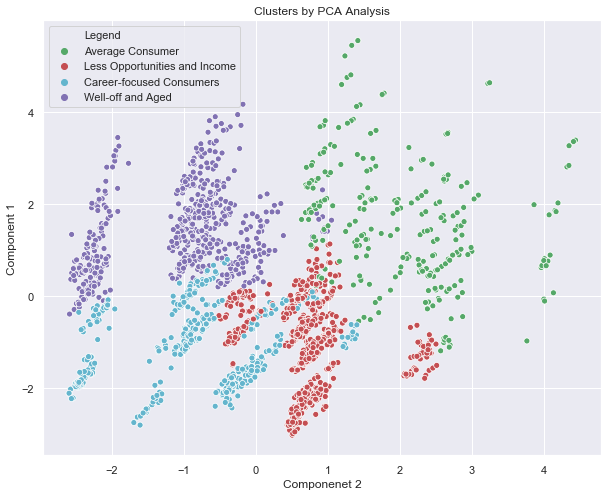

In [105]:
x_axis = df_k_means_pca['Componenet 2']
y_axis= df_k_means_pca['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_k_means_pca['Legend'], palette=['g','r','c','m'])
plt.title('Clusters by PCA Analysis')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

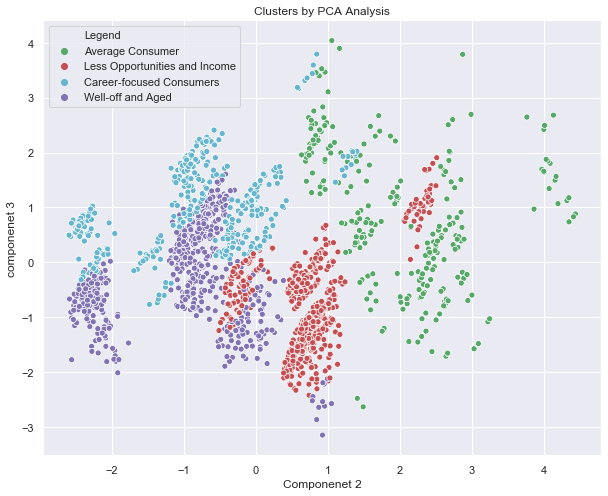

In [106]:
x_axis = df_k_means_pca['Componenet 2' ]
y_axis= df_k_means_pca['componenet 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_k_means_pca['Legend'], palette=['g','r','c','m'])
plt.title('Clusters by PCA Analysis')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

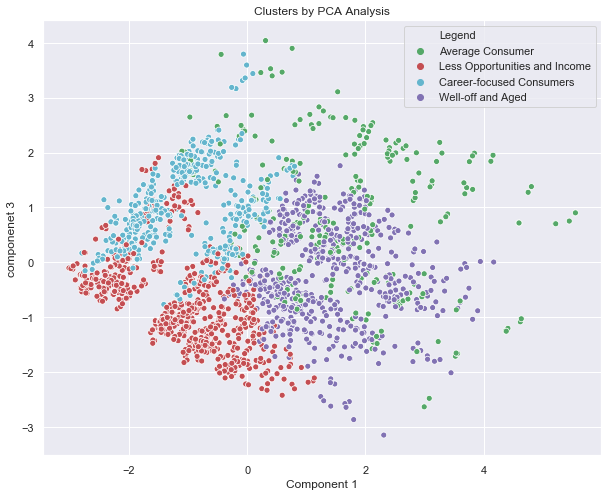

In [108]:
x_axis = df_k_means_pca['Component 1' ]
y_axis= df_k_means_pca['componenet 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_k_means_pca['Legend'], palette=['g','r','c','m'])
plt.title('Clusters by PCA Analysis')
plt.show

In [110]:
pickle.dump(scaler,open('scaler.pickle','wb'))